In [16]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

VISION_KEY = '65090791ce7d4c31abf67c72c979a20a'
VISION_ENDPOINT = 'https://wintellect-vision.cognitiveservices.azure.com/'

client = ComputerVisionClient(
    VISION_ENDPOINT,
    CognitiveServicesCredentials(VISION_KEY)
)

a man riding a sand dune (53.8%)


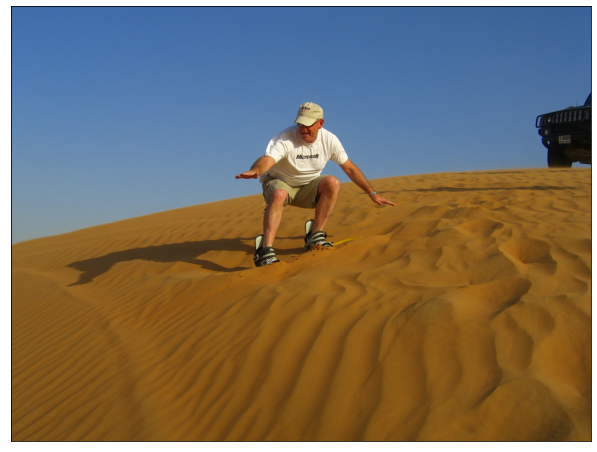

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

image = plt.imread('Data/dubai.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/dubai.jpg', mode='rb') as image:
    result = client.describe_image_in_stream(image)
    
    for caption in result.captions:
        print(f'{caption.text} ({caption.confidence:.1%})')

In [3]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.describe_image_in_stream(image)
    
    for tag in result.tags:
        print(f'{tag}')

sky
outdoor
nature
dune


In [4]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.tags])

    for tag in result.tags:
        print(f'{tag.name} ({tag.confidence:.1%})')

dune (99.5%)
sky (99.2%)
outdoor (98.7%)
clothing (98.2%)
desert (98.1%)
sand (97.9%)
aeolian landform (96.9%)
person (96.1%)
singing sand (95.8%)
erg (94.0%)
sahara (93.6%)
nature (93.4%)
footwear (90.9%)
landscape (88.0%)
sand dune (83.5%)
ground (77.5%)


In [5]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.tag_image_in_stream(image)

    for tag in result.tags:
        print(f'{tag.name} ({tag.confidence:.1%})')

dune (99.5%)
sky (99.2%)
outdoor (98.7%)
clothing (98.2%)
desert (98.1%)
sand (97.9%)
aeolian landform (96.9%)
person (96.1%)
singing sand (95.8%)
erg (94.0%)
sahara (93.6%)
nature (93.4%)
footwear (90.9%)
landscape (88.0%)
sand dune (83.5%)
ground (77.5%)


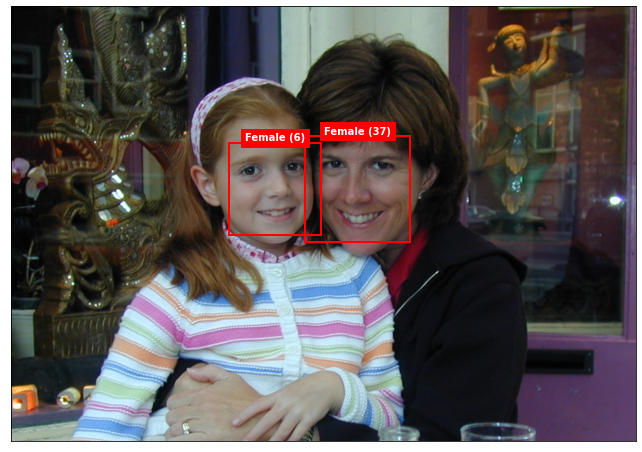

In [6]:
from matplotlib.patches import Rectangle

def annotate_face(face):
    x, y = face.face_rectangle.left, face.face_rectangle.top
    w, h = face.face_rectangle.width, face.face_rectangle.height
    rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)
    text = f'{face.gender} ({face.age})'
    ax.text(x + (w / 2), y, text, color='white', backgroundcolor='red', ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))

image = plt.imread('Data/amsterdam.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/amsterdam.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.faces])

    for face in result.faces:
        annotate_face(face)

Adultness: 0.02214685082435608
Raciness: 0.4205135107040405
Goriness: 0.001663445495069027
Is adult: False
Is racy: False
Is gory: False


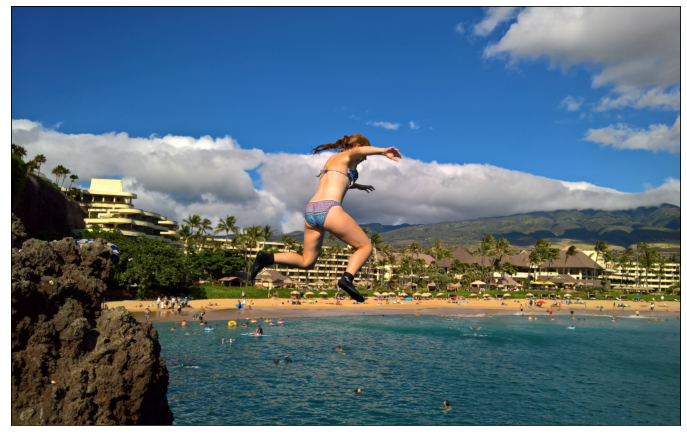

In [7]:
image = plt.imread('Data/maui.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/maui.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.adult])

    print(f'Adultness: {result.adult.adult_score}')
    print(f'Raciness: {result.adult.racy_score}')
    print(f'Goriness: {result.adult.gore_score}')
    
    print(f'Is adult: {result.adult.is_adult_content}')
    print(f'Is racy: {result.adult.is_racy_content}')
    print(f'Is gory: {result.adult.is_gory_content}')

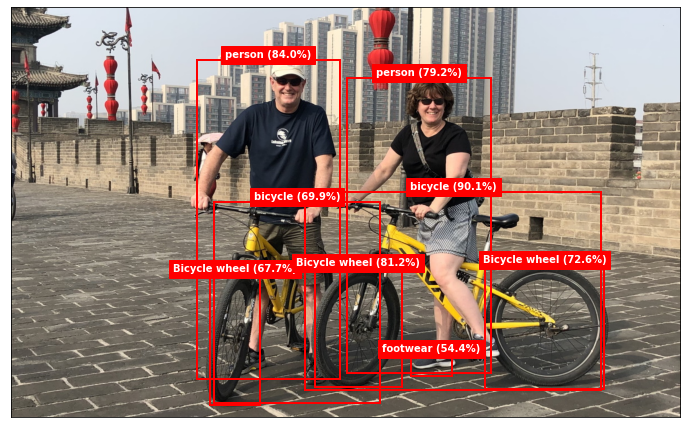

In [8]:
from matplotlib.patches import Rectangle

def annotate_object(name, confidence, bbox, min_confidence=0.5):
    if (confidence > min_confidence):
        x, y, w, h = bbox.x, bbox.y, bbox.w, bbox.h
        rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
        ax.add_patch(rect)
        text = f'{name} ({confidence:.1%})'
        ax.text(x + (w / 2), y, text, color='white', backgroundcolor='red', ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))

image = plt.imread('Data/xian.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
        
with open('Data/xian.jpg', mode='rb') as image:
    result = client.detect_objects_in_stream(image)
    
    for object in result.objects:
        annotate_object(object.object_property, object.confidence, object.rectangle)

1040-ES
21 Estimated Tax
20
t af the Treasury
Internal
File only if you are making a payment of estimated tax by check or money order. Mail this
voucher with your check or money order payable to "United States Treasury." Write your
social security number and "2021 Form 1040-ES" on your check or money order. Do not send
cash. Enclose, but do not staple or attach, your payment with this voucher.
Payment 3
Voucher
OMB No. 1545-0074
Calendar year—Due Sept. 15, 2021
Amount of estimated tax you are paying
by check or
money order.
Dollars
Cents
00
pay at
www.irs.govl
Simple.
Fast.
secure.
Your first name and middle initial
If joint payment, complete for spouse
Spouse's first name and middle initial
Address (number, street, and apt. no.)
10
Your last name
Spouse's last name
City, town, or post office. If you have a foreign address, also complete spaces below.
Foreign country name
Foreign province/county
Your social security number
zl
Spouse's social security number
ZIP code
Foreign postal code

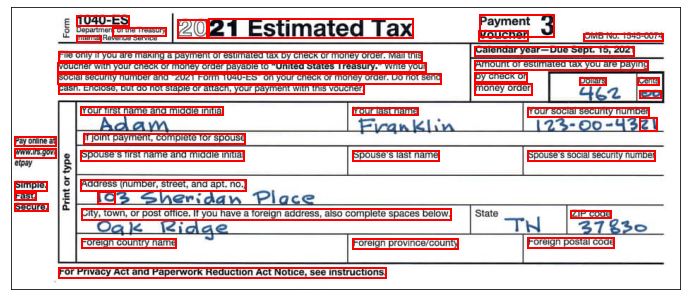

In [12]:
def draw_box(bbox):
    vals = bbox.split(',')
    x = int(vals[0])
    y = int(vals[1])
    w = int(vals[2])
    h = int(vals[3])
    rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)

image = plt.imread('Data/1040-Form-3.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/1040-Form-3.jpg', mode='rb') as image:
    result = client.recognize_printed_text_in_stream(image)
    
    for region in result.regions:
        for line in region.lines:
            text = ' '.join([x.text for x in line.words])
            print(text)
            draw_box(line.bounding_box)

1040-ES
2021 Estimated Tax
Payment
3
Department of the Treasury
Internal Revenue Service
Voucher
OMB No. 1545-0074
Form
File only if you are making a payment of estimated tax by check or money order. Mall this
Calendar year-Due Sept. 15, 2021
voucher with your check or money order payable to "United States Treasury." Write your
Amount of estimated tax you are paying
social security number and "2021 Form 1040-ES" on your check or money order. Do not send
by check or
cash. Enclose, but do not staple or attach, your payment with this voucher.
money order.
Dollars
Cents
462
Your first name and middle initial
Your last name
Adam
Your social security number
Franklin
123-00-4321
Pay online at
If joint payment, complete for spouse
www.irs.gov/
Spouse's first name and middle initial
etpay
Spouse's last name
Spouse's social security number
Simple.
Address (number, street, and apt. no.)
Fast.
103 Sheridan Place
Secure.
City, town, or post office. If you have a foreign address, also complete space

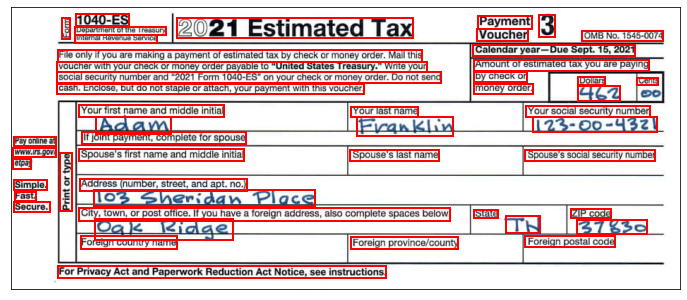

In [13]:
import time
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes

def draw_box(bbox):
    x, y  = bbox[0], bbox[1]
    w = bbox[4] - x
    h = bbox[5] - y
    rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)

image = plt.imread('Data/1040-Form-3.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/1040-Form-3.jpg', mode='rb') as image:
    response = client.read_in_stream(image, raw=True)
    
    location = response.headers["Operation-Location"]
    opid = location[len(location) - 36:]
    result = client.get_read_result(opid)
    
    while result.status == OperationStatusCodes.running:
        result = client.get_read_result(opid)
        time.sleep(1)
        
    if result.status == OperationStatusCodes.succeeded:
        for line in result.analyze_result.read_results[0].lines:
            draw_box(line.bounding_box)
            print(line.text)

In [11]:
from azure.cognitiveservices.vision.computervision.models import ComputerVisionErrorResponseException
from azure.core.exceptions import AzureError

try:
    with open('Data/weeping_valley.jpg', mode='rb') as image:
        result = client.describe_image_in_stream(image)

        for caption in result.captions:
            print(f'{caption.text} ({caption.confidence:.1%})')

except ComputerVisionErrorResponseException as e:
    print(e.message)
    
except AzureError as e:
    print(e.message)
    
except Exception as e:
    print(e)

(InvalidRequest) Input image is too large.
